Zadanie 1 Hamilton
Wykonał: Plakushko Maksym

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sk

df = pd.read_csv("data/broadway.csv")


In [2]:
df.drop(['Statistics.GrossPotential'], axis=1, inplace=True)
df = df.dropna()

In [ ]:
def del_date(df):
    for date in df['Date.Year']:
        if date in range(1900, 2024):
            continue
        else:
            print(date)
            df = df.drop(index=df[df['Date.Year'] == date].index[0])
    return df
df = del_date(df)

In [ ]:
def drop_duplicates(df):
    duplicates = df[df.duplicated(keep=False)]
    print(duplicates)
    df = df.drop(index=duplicates.index)
    return df
df = drop_duplicates(df)

In [4]:
data_dict = {'Musical': 0, 'Play': 1, 'Special' : 2}
df['Show.Type'] = df['Show.Type'].map(data_dict).fillna(-1)

Year with maximum capacity: 12
Year with minimum capacity: 11


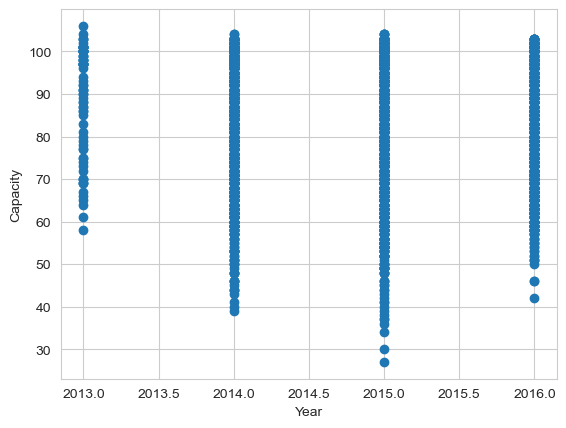

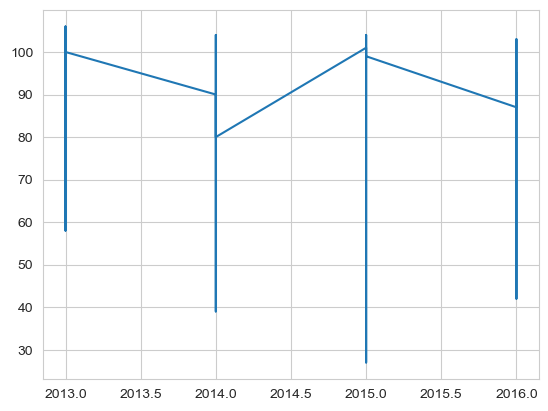

In [5]:
print('Year with maximum capacity:',df.loc[df['Statistics.Capacity'].idxmax(), 'Date.Month'])
print('Year with minimum capacity:',df.loc[df['Statistics.Capacity'].idxmin(), 'Date.Month'])
x = plt.xlabel('Year')
y = plt.ylabel('Capacity')
plt.scatter(df['Date.Year'], df['Statistics.Capacity'])
plt.show()
plt.plot(df['Date.Year'], df['Statistics.Capacity'])
plt.show()

In [6]:
# Приклад графіку частот
value_counts = df['Show.Theatre'].value_counts()
value_counts.head(2)


Show.Theatre
Minskoff    141
Gershwin    140
Name: count, dtype: int64

Najczęściej sztuki wystawiały teatry: Shubert i Minskoff

In [7]:
value_c = df['Date.Month'].value_counts()
value_c.head(12)

Date.Month
5     495
4     433
6     433
3     429
1     387
7     379
12    370
11    355
2     334
8     289
10    250
9     209
Name: count, dtype: int64

Najwięcej wystawiono sztuk w maju, najmniej - wrzesień 

In [8]:
print("Correlation between Gross and Attendance",df['Statistics.Gross'].corr(df['Statistics.Attendance']))

Correlation between Gross and Attendance 0.8587733767464245


Między dochodami przedstawienia i jego popularnością jestnieje pozytywna korelacja 85.8%

Średnia frekwencja dla każdego rodzaju sztuki:
Show.Type
Special    9403.482759
Musical    8804.561056
Play       5721.078818
Name: Statistics.Attendance, dtype: float64


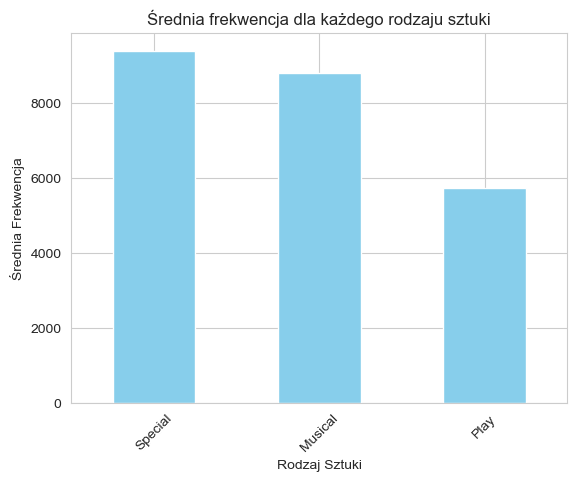

In [9]:
df_t = pd.read_csv("data/broadway.csv")
mean_attendance = df_t.groupby('Show.Type')['Statistics.Attendance'].mean().sort_values(ascending=False)
print("Średnia frekwencja dla każdego rodzaju sztuki:")
print(mean_attendance)
mean_attendance.plot(kind='bar', color='skyblue')
plt.xlabel('Rodzaj Sztuki')
plt.ylabel('Średnia Frekwencja')
plt.title('Średnia frekwencja dla każdego rodzaju sztuki')
plt.xticks(rotation=45)
plt.show()


Najchętniej chodzono na Specjalny rodzaj sztuki

<Axes: >

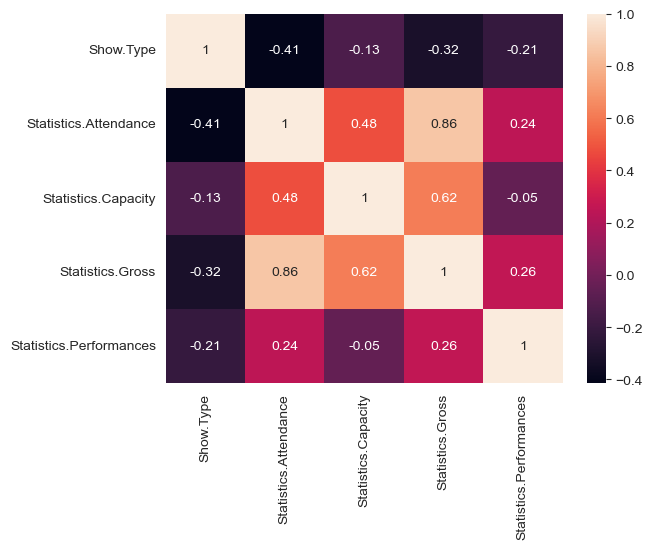

In [10]:
df.drop(columns=['Date.Year', 'Date.Day', 'Date.Month', 'Date.Full', 'Show.Theatre', 'Show.Name'], inplace=True)
df.corr()
sns.heatmap(df.corr(), annot=True)

Największą korelację wykazują cechy: Popularność i Dochody(86%), Objętość i Dochody(62%), Objętość i Popularność(48%).